In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from pykoala.data_container import DataMask
from matplotlib import pyplot as plt

In [21]:
data_mask = DataMask(shape=(2000, 100, 100),
                     flag_map={"CR": (2, "Cosmic ray"), "HP": (4, "Hot pixel")})

In [22]:
import numpy as np

# Flag pixels as cosmic rays
hp = np.zeros_like(data_mask.bitmask, dtype=bool)
hp[::3, ::3] = True

# Flag pixels as hot pixels
dp = np.zeros_like(data_mask.bitmask, dtype=bool)
dp[:, ::3, ::3] = True

data_mask.flag_pixels(mask=hp, flag_name='CR')
data_mask.flag_pixels(mask=dp, flag_name='HP')

hp_mask = data_mask.get_flag_map('HP')

In [23]:
hdu = data_mask.dump_to_hdu()
hdu.header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
NAXIS3  =                 2000                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
FLAG_CR =                    2 / Cosmic ray                                     
FLAG_HP =                    4 / Hot pixel                                      
EXTNAME = 'BITMASK '           / extension name                                 
COMMENT Each flag KEY is stored using the convention FLAG_KEY                   
COMMENT A value of 0 means u

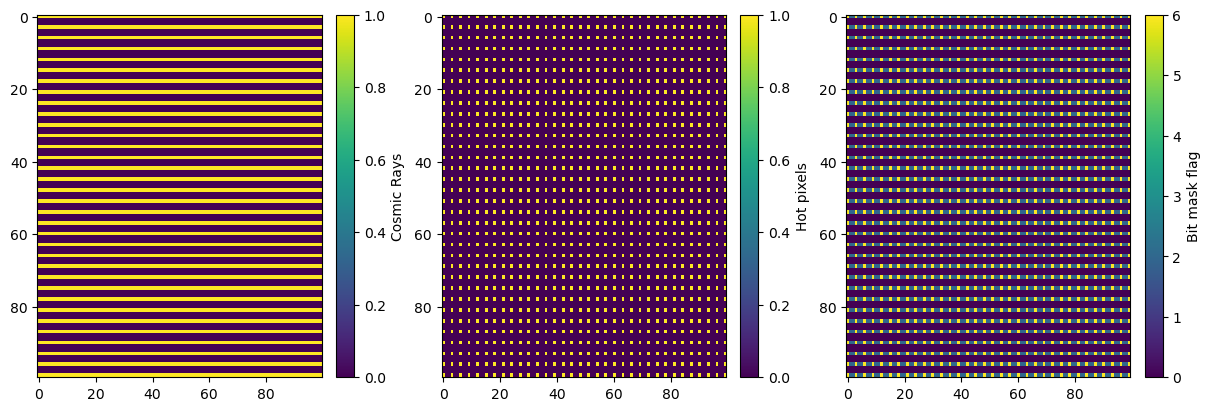

In [24]:
plt.figure(figsize=(12, 4), constrained_layout=True)
plt.subplot(131)
plt.imshow(data_mask.get_flag_map('CR')[0], interpolation='none', aspect='auto')
plt.colorbar(label='Cosmic Rays')
plt.subplot(132)
plt.imshow(data_mask.get_flag_map('HP')[0], interpolation='none', aspect='auto')
plt.colorbar(label='Hot pixels')
plt.subplot(133)
plt.imshow(data_mask.bitmask[0], interpolation='none', aspect='auto')
plt.colorbar(label='Bit mask flag')
